### Evaluation Assignment 1
1. Create a dataset containing information about the prices of houses in a particular city. The dataset includes the following features for each house:
    - Size (in square feet)
    - Number of bedrooms
    - Age of the house (in years)
    - Distance to city center (in miles)
    - Price (in $)

(a) Train a Linear Regression Model: Use the features (Size, Number of bedrooms, Age, Distance to city center) to predict the price of houses.

(b) Evaluate the Model: After training the model on the training set, evaluate its performance using Mean Squared Error (MSE) as the performance metric.

(c) Interpret the Results: Interpret the coefficients of the linear regression model. What are the values of the coefficients for each feature in the model? What is the impact of each feature on the predicted house price?

(d) Given the following house details, predict the price using your trained model:
    - Size: 2500 sq. ft.
    - Number of bedrooms: 4
    - Age: 10 years
    - Distance to city center: 5 miles

Note: You are not allowed to use any built-in functions of any machine learning model.


In [20]:
import pandas as pd
import numpy as np

data=pd.read_csv('house.csv')

"""
bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
1,26.18409786440993,1286.68,204.0038172983832,22,67,96004.80455671564
1,34.86690091132422,1855.25,186.9803604183612,8,30,92473.7225680616
1,36.980708990751,692.09,111.22499920528696,24,24,98112.5199416717
"""

# change center distance from metres to miles
data['center_distance']=data['center_distance']/1609.34

# change area sq meters to sq feet
data['net_sqm']=data['net_sqm']*10.7639

X=data[['bedroom_count','net_sqm','center_distance','age']]
print(X)
Y=data['price']
print(Y)

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)




      bedroom_count      net_sqm  center_distance  age
0                 1   281.843011         0.799508   67
1                 1   375.303835         1.152802   30
2                 1   398.056654         0.430046   24
3                 1   187.784019         0.869605   66
4                 1   566.048163         0.052599    3
...             ...          ...              ...  ...
4303              9  1885.475047         0.807604    5
4304              6  2318.029019         0.836591    5
4305              5  3224.476640         0.985106    5
4306              1   314.240293         1.178266    2
4307              2   585.960589         0.158599    0

[4308 rows x 4 columns]
0        96004.804557
1        92473.722568
2        98112.519942
3        92118.326874
4        98976.653176
            ...      
4303    102707.356224
4304     99695.064992
4305     93803.715617
4306     92914.729126
4307     93743.047292
Name: price, Length: 4308, dtype: float64


### Normalize the input data (X)

In [21]:
def np_normalize(X):
    return (X-X.mean())/X.std()

X_train=np_normalize(X_train)
print(X_train)
print(Y_train)
X_test=np_normalize(X_test)


      bedroom_count   net_sqm  center_distance       age
3567      -0.704131 -0.098794        -1.624877  1.572181
2514       0.101994  0.381670        -1.109208 -0.963042
3034       1.311180 -0.597456        -0.972326  0.884049
4032       0.101994 -0.051846         0.651067 -0.311128
1473      -0.301068 -0.457020         0.009851 -0.202475
...             ...       ...              ...       ...
221       -1.107193 -1.072130         1.090564  0.992701
3076       1.311180  0.204054        -0.726061 -1.361434
3702       0.505056  0.101746        -1.569176  0.884049
3913       0.101994  2.192786        -1.430672 -0.021388
1483      -0.301068  0.261779         1.177548 -1.433869

[3446 rows x 4 columns]
3567     91614.268484
2514    100905.769136
3034     95356.388498
4032     94111.226195
1473     95200.750478
            ...      
221      88139.680213
3076     98616.159920
3702     91740.330770
3913     99887.232458
1483     96374.459977
Name: price, Length: 3446, dtype: float64


In [22]:
def np_add_ones(X):
    ones=np.ones((X.shape[0],1))
    return np.concatenate((ones,X),axis=1)

X_train=np_add_ones(X_train)

X_test=np_add_ones(X_test)

theta=np.zeros(X_train.shape[1])

def np_hypothesis(X,theta):
    return X.dot(theta)

# print(X_train,X_test,theta)

def np_cost(X,Y,theta):
    m=len(Y)
    return 1/(2*m)*np.sum((X.dot(theta)-Y)**2)

def np_gradient_descent(X,Y,theta,alpha,iterations):
    m=len(Y)
    for i in range(iterations):
        #display cost at each iteration
        if i%100==0:
            print(np_cost(X,Y,theta))
        theta=theta-alpha/m*X.T.dot(X.dot(theta)-Y)
    return theta

theta=np_gradient_descent(X_train,Y_train,theta,0.001,10000)

4587896534.133827
3755953658.726514
3075005417.7380443
2517632388.143799
2061398523.8439689
1687944193.6268744
1382244655.0941222
1132003678.008813
927157607.5925694
759469698.821522
622198252.202679
509825097.6334581
417833433.3668169
342526035.1926991
280876490.5563127
230407451.57001296
189090995.11132482
155267072.4985811
127576762.30132729
104907637.58970468
86349047.75291626
71155514.82856241
58716771.333674446
48533234.146271
40195927.895707764
33370050.44100607
27781519.590921883
23205960.168674372
19459688.68959017
16392333.26114523
13880792.070871199
11824287.647961449
10140318.136825588
8761342.879024992
7632069.11528434
6707230.7793016555
5949770.131809979
5329349.17226092
4821131.017633455
4404782.286063124
4063656.403417572
3784125.0205714745
3555030.680191994
3367238.7435120223
3213270.575651453
3087003.25280002
2983423.7272167415
2898427.5739149614
2828654.2340059727
2771352.135947599
2724268.276288156
2685557.8241494712
2653710.118136928
2627488.0829133256
2605878.6317

In [23]:
print(theta)

[95705.62392141   397.23833662  2336.12879868 -1606.90040936
  -713.58759569]


### testing the model with the given data

In [24]:
X_test.dot(theta)

def MSE(Y,Y_pred):
    return np.mean((Y-Y_pred)**2)

Y_pred=X_test.dot(theta)
print(MSE(Y_test,Y_pred))
# print y_test and y_pred and difference one by one in table
print(pd.DataFrame({'Y_test':Y_test,'Y_pred':Y_pred,'diff':Y_test-Y_pred}))

5269565.757222466
             Y_test         Y_pred         diff
3664   92524.152542   91535.082984   989.069558
1652   97922.229354   95381.958260  2540.271093
1694   91824.335756   93812.047575 -1987.711819
2583   94551.347076   97351.812614 -2800.465538
464    94251.050434   95009.028204  -757.977770
...             ...            ...          ...
668    92690.509686   94636.195832 -1945.686146
3470  103171.941344  101692.519075  1479.422269
2963   93893.442519   95693.187785 -1799.745266
3320   97659.264302   99385.320885 -1726.056582
4144   98864.576144  102843.664200 -3979.088056

[862 rows x 3 columns]


### check sample input

In [25]:
# get the price prediction for size 2500 sqft, 4 bedrooms, 5 miles from center, 10 years old
# contruct the sample
# add 1 to the beginning
# normalize
# dot product with theta
sample=np.array([1,4,2500,5,10])
sample[1:]=np_normalize(sample[1:])
print(sample.dot(theta))

98041.75272008416


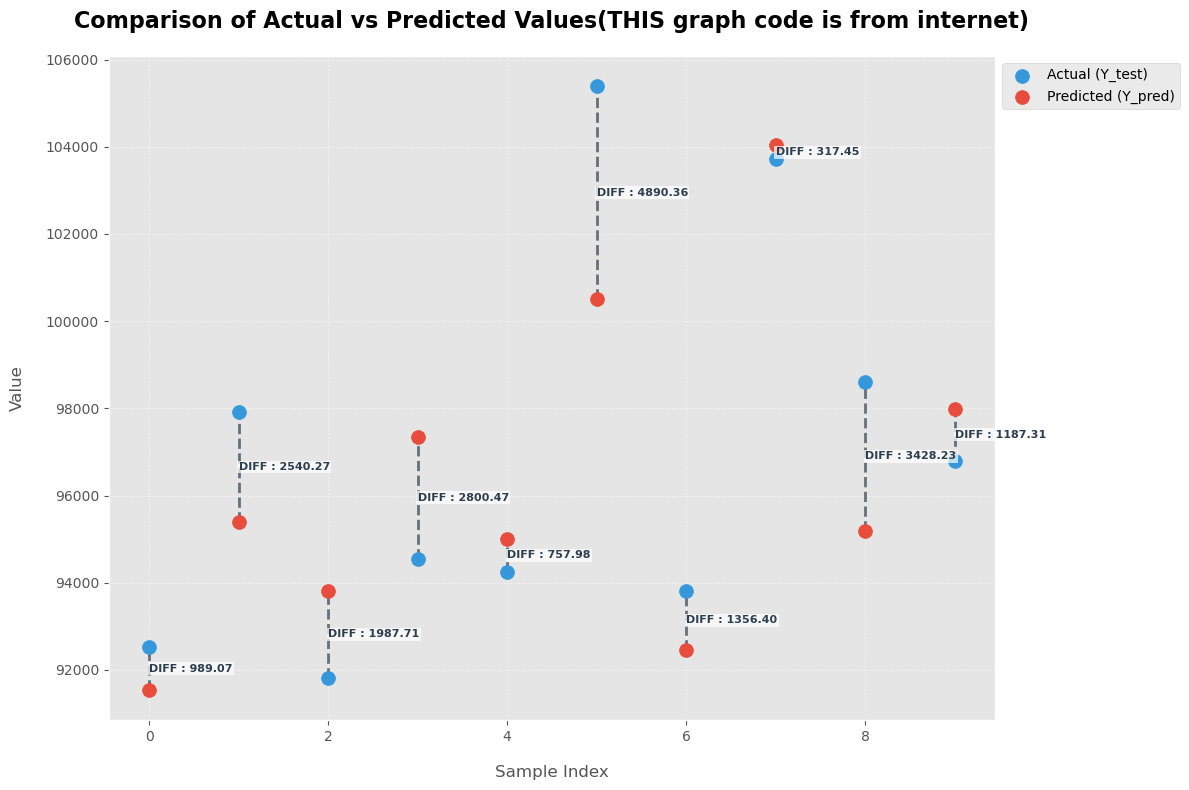

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_regression_comparison(Y_test, Y_pred, count=10):
    plt.figure(figsize=(12, 8))
    
    x = np.arange(count)
    
    # Ensure Y_test and Y_pred are pandas Series
    Y_test = pd.Series(Y_test)
    Y_pred = pd.Series(Y_pred)
    
    # Plot actual values
    plt.scatter(x, Y_test.iloc[:count], color='#3498db', s=100, label='Actual (Y_test)', zorder=2)
    
    # Plot predicted values
    plt.scatter(x, Y_pred.iloc[:count], color='#e74c3c', s=100, label='Predicted (Y_pred)', zorder=2)
    
    # Plot vertical lines to show the gap and add delta labels
    for i in range(count):
        y_test = Y_test.iloc[i]
        y_pred = Y_pred.iloc[i]
        y_min = min(y_test, y_pred)
        y_max = max(y_test, y_pred)
        plt.vlines(x=i, ymin=y_min, ymax=y_max, 
                   color='#2c3e50', linestyle='--', alpha=0.7, linewidth=2, zorder=1)
        
        # Calculate and display delta
        delta = abs(y_test - y_pred)
        plt.text(i, (y_min + y_max) / 2, f'DIFF : {delta:.2f}', 
                 horizontalalignment='left', verticalalignment='center',
                 fontsize=8, color='#2c3e50', fontweight='bold',
                 bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, pad=1))

    plt.title('Comparison of Actual vs Predicted Values(THIS graph code is from internet)', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Sample Index', fontsize=12, labelpad=15)
    plt.ylabel('Value', fontsize=12, labelpad=15)
    
    plt.legend(fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))
    
    plt.grid(True, linestyle=':', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Assuming Y_test and Y_pred are already defined
plot_regression_comparison(Y_test, Y_pred)